<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [2]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\solim\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\solim\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\solim\.julia\environments\v1.8\Manifest.toml`


In [3]:
import SpecialFunctions
import Plots

In [4]:
#testing loop outside of function
using SpecialFunctions
μ = -1
σ = 2
n = 1000 
inv_cdf_list = []
    for i in 1:n
        x = rand()
        inv_cdf = μ + σ*sqrt(2)*erfinv(2x-1)
        push!(inv_cdf_list, inv_cdf)
    end
inv_cdf_list

1000-element Vector{Any}:
 -1.3164002327216766
 -0.32211640942684927
 -0.24097458340577416
  0.012443521461022122
 -0.8676018187587129
  3.6142467168398493
  2.0075108033832962
 -1.5556209993453056
  2.368146296017467
  2.638871249037063
 -1.2175052112861047
 -0.9493738567158139
 -0.2814045988851367
  ⋮
 -2.5090404062012164
 -3.3220602293171955
 -3.852444893508555
  0.33242938345194606
 -2.6511289145471784
 -1.5515295697823648
 -1.684150817931584
 -4.949346111967065
  1.5187191897642558
 -2.5103021165353345
  0.2757193261184758
  2.4555144550757704

In [5]:

function sample_gaussian(μ,σ,n::Int64)
    inv_cdf_list = [] #create an empty list for inverse cdf values
    for i in 1:n #interate the amount of times entered for n
        x = rand() #represents a random number from 0-1, the probability for gaussian
        inv_cdf = μ + σ*sqrt(2)*erfinv(2x-1) #equation for inverse cdf function
        push!(inv_cdf_list, inv_cdf) #add inverse cdf value to list
    end
    return inv_cdf_list #return list of inverse cdf values
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [6]:
sample_g = sample_gaussian(-1,2,10000) 

10000-element Vector{Any}:
 -1.6457815670586087
  0.917844929930038
 -1.3659860638906174
 -0.35744404910109195
 -0.7917231561136207
 -2.675031379833986
  0.41086484866798045
  0.9930374117165204
  1.794972838772018
  0.8159012071837397
 -1.9928113333934658
  2.1245473647567588
 -5.514491129345042
  ⋮
  1.3167021509090966
 -3.7661897767088512
  1.4364382020236812
  0.7116450296242378
 -0.6512569492401907
 -1.2707174960229501
 -0.8386449904910604
  0.4103362973359994
  0.16447297345091694
 -3.3592797423797967
 -3.165873963426651
 -5.12570771529513

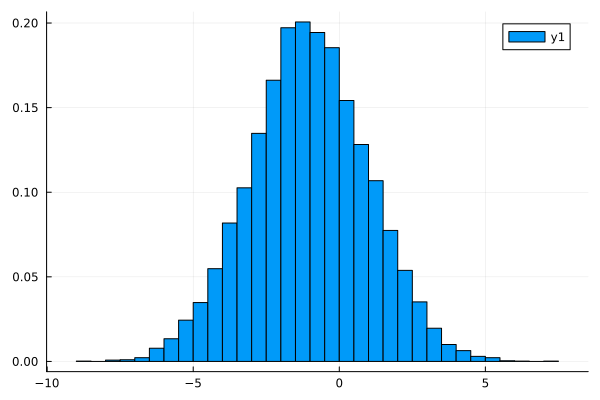

In [19]:
using Plots
histogram(sample_g, normalize = true)

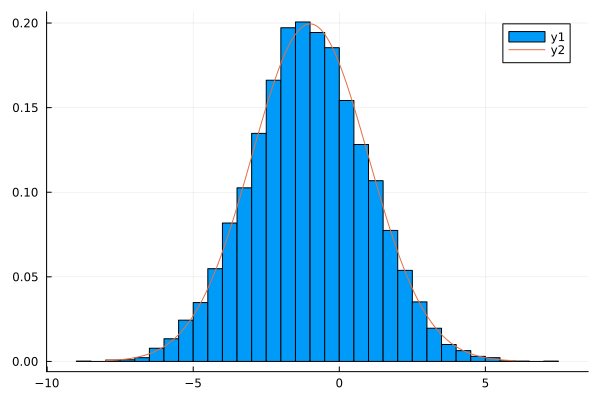

In [20]:
import Distributions as di
import Random
using Distributions

x_dist = -8:0.001:6
norm = di.Normal(-1,2)
plot!(x_dist, di.pdf.(norm, x_dist))